# **Case Study 2: ATM Transaction data**


In [20]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading the dataset
df=pd.read_csv("atm bank dataset.csv")
df.head()

,id,atm_name,weekday,festival_religion,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
0,11,Mount Road ATM,MONDAY,NH,W,WWW,1,1,2011,648600,897100
1,16,Mount Road ATM,TUESDAY,NH,W,WWW,1,1,2011,648600,826000
2,21,Mount Road ATM,WEDNESDAY,NH,W,WWW,1,1,2011,648600,754400
3,26,Mount Road ATM,THURSDAY,NH,W,WWW,2,1,2011,648600,834200
4,31,Mount Road ATM,FRIDAY,NH,W,WWW,2,1,2011,648600,575300


In [21]:
print(df.shape )
#for knowing statastical values
df.describe()

(2244, 11)


,id,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
count,2244.000000,2244.000000,2244.000000,2244.000000,2.244000e+03,2.244000e+03
mean,5706.037433,3.557932,6.313280,2013.710784,5.150901e+05,5.157175e+05
std,3348.296502,1.760703,3.257336,1.920082,1.935272e+05,2.551791e+05
min,11.000000,1.000000,1.000000,2011.000000,1.800000e+03,1.000000e+02
25%,2816.750000,2.000000,4.000000,2012.000000,4.197290e+05,3.494750e+05
50%,5664.500000,4.000000,6.000000,2014.000000,5.403860e+05,5.141000e+05
75%,8447.250000,5.000000,9.000000,2015.000000,6.378000e+05,6.849250e+05
max,11585.000000,7.000000,12.000000,2017.000000,1.006829e+06,1.410700e+06




*   2244 rows and 11 columns




In [22]:
#check the datatype of each variable
print(df.dtypes)
print()
#checking null values
print(df.isnull().sum())

#drop 1st and 2nd column from the dataset
df = df.drop(df.columns[[0,1]], axis=1) 

id                         int64
atm_name                  object
weekday                   object
festival_religion         object
working_day               object
holiday_sequence          object
trans_date_set             int64
trans_month                int64
trans_year                 int64
prevweek_mean              int64
total_amount_withdrawn     int64
dtype: object

id                        0
atm_name                  0
weekday                   0
festival_religion         0
working_day               0
holiday_sequence          0
trans_date_set            0
trans_month               0
trans_year                0
prevweek_mean             0
total_amount_withdrawn    0
dtype: int64


* There is no Null values.

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


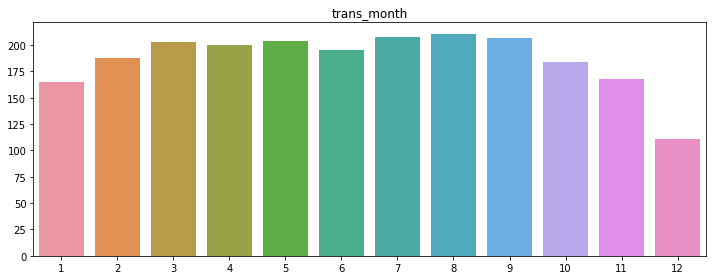

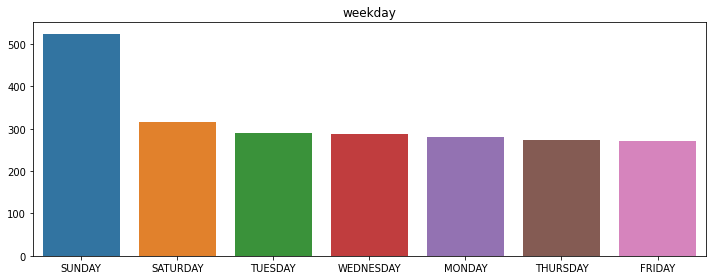

In [23]:
categorcial_variables = ['trans_month','weekday']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().index,df[col].value_counts().values)
    plt.title(col)
    plt.tight_layout()

As we can see in the bar plot, Saturdays and Sundays are the most active days to withdraw money.


In [24]:
#categorical to numerical
df=pd.get_dummies(df,columns=['weekday','festival_religion','working_day','holiday_sequence'])
df.shape

(2244, 27)

After OHE we have 2244 observations with 27 columns (features).

<AxesSubplot:>

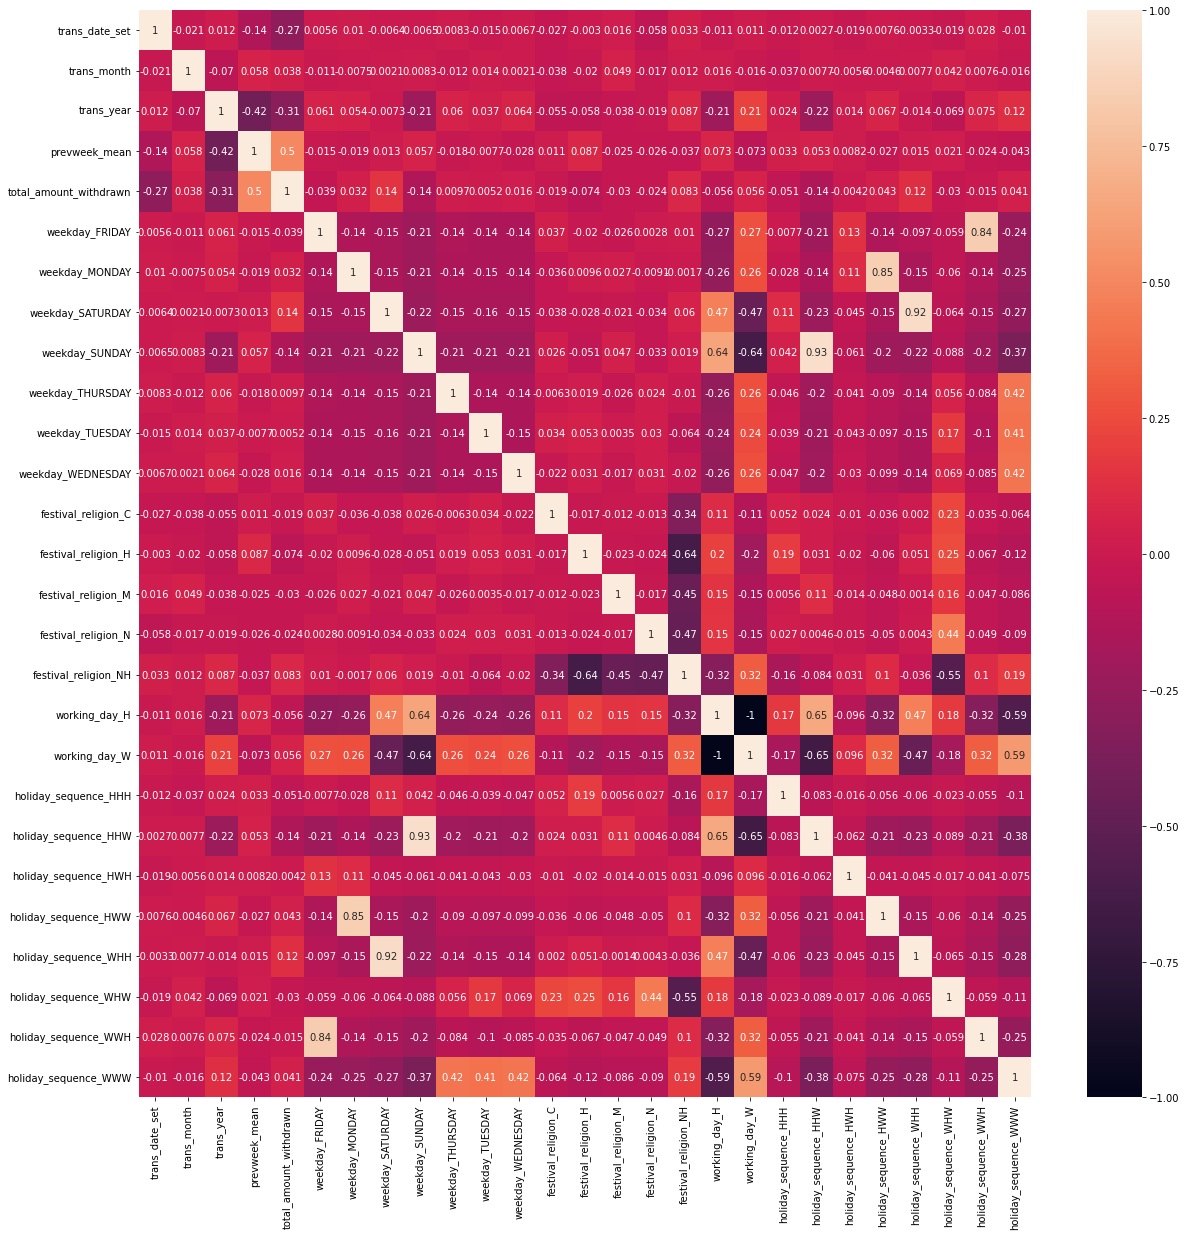

In [25]:
#heatmap of correlation between each variable
corr=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [26]:
#selecting one feature amoung highly correlated varible
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df1 = df[selected_columns]

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [28]:

x = df1.drop(columns = ['total_amount_withdrawn'])
y = df1['total_amount_withdrawn']


xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_x= StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

#scaling target variable
ytrain=sc.fit_transform(ytrain.values.reshape(-1,1))
ytest=sc.transform(ytest.values.reshape(-1,1))



(1795, 24) (449, 24) (1795,) (449,)


#Linear Regression


In [29]:
model=LinearRegression()
model.fit(xtrain,ytrain)
pred=model.predict(xtest)


In [30]:
#calculating RMSE,MSE,MAE and r2_score
from sklearn import metrics
MAE_lr=metrics.mean_absolute_error(ytest,pred)
MSE_lr=metrics.mean_squared_error(ytest,pred)
RMSE_lr=np.sqrt(MSE_lr)
r2_lr=metrics.r2_score(ytest,pred)

print(MAE_lr)
print(MSE_lr)
print(RMSE_lr)                    
print(r2_lr)

0.6305056374554735
0.6386555275527361
0.7991592629462141
0.39286587283057306


#XGBoost Regression

In [31]:
import xgboost as xgb

model_xgb=xgb.XGBRegressor()
model_xgb.fit(xtrain,ytrain)
pred=model_xgb.predict(xtest)


In [32]:
from sklearn import metrics
MAE_xb=metrics.mean_absolute_error(ytest,pred)
MSE_xb=metrics.mean_squared_error(ytest,pred)
RMSE_xb=np.sqrt(MSE_xb)
r2_xb=metrics.r2_score(ytest,pred)

print(MAE_xb)
print(MSE_xb)
print(RMSE_xb)   
print(r2_xb)

0.5832878841023665
0.5841712616486582
0.7643109718227642
0.44466102028806986


#Support Vector Regression

In [33]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(xtrain,ytrain)

y_pred = regressor.predict(xtest)

C:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
MAE_svr=metrics.mean_absolute_error(ytest,y_pred)
MSE_svr=metrics.mean_squared_error(ytest,y_pred)
RMSE_svr=np.sqrt(MSE_svr)
r2_svr=metrics.r2_score(ytest,y_pred)

print(MAE_svr)
print(MSE_svr)
print(RMSE_svr)   
print(r2_svr)

0.5856776491828136
0.5563776385327631
0.7459072586674319
0.4710828649028126


In [35]:
# lgbm_predict=gbm.predict(xtest,num_iteration=gbm.best_iteration_)
# data3= pd.DataFrame({'Actual': ytest, 'Predicted': lgbm_predict})
# data3

# ANN

In [36]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


# Initializing the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(25, activation = 'relu', input_dim = 24))
# Adding the 2 hidden layer
classifier.add(Dense(20, activation = 'relu'))
# Adding the 3 hidden layer
classifier.add(Dense(15, activation = 'relu'))
# Adding the 4 hidden layer
classifier.add(Dense(8,  activation = 'relu'))
# Adding the output layer
classifier.add(Dense(1, activation = 'linear'))
# Adding the output layer
#classifier.add(Dense(1, activation = 'linear'))
# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'mse')
# Fitting the ANN to the Training set
classifier.fit(xtrain, ytrain, batch_size=100,epochs = 500)
# Part 3 - Making the predictions and evaluating the model
# Predicting the Test set results
y_pred = classifier.predict(xtest)

Epoch 1/500
18/18 [==============================] - 0s 2ms/step - loss: 0.9946
Epoch 2/500
18/18 [==============================] - 0s 2ms/step - loss: 0.8800
Epoch 3/500
18/18 [==============================] - 0s 2ms/step - loss: 0.8023
Epoch 4/500
18/18 [==============================] - 0s 2ms/step - loss: 0.7477
Epoch 5/500
18/18 [==============================] - 0s 2ms/step - loss: 0.7132
Epoch 6/500
18/18 [==============================] - 0s 2ms/step - loss: 0.6875
Epoch 7/500
18/18 [==============================] - 0s 2ms/step - loss: 0.6622
Epoch 8/500
18/18 [==============================] - 0s 2ms/step - loss: 0.6312
Epoch 9/500
18/18 [==============================] - 0s 2ms/step - loss: 0.6069
Epoch 10/500
18/18 [==============================] - 0s 2ms/step - loss: 0.5879
Epoch 11/500
18/18 [==============================] - 0s 2ms/step - loss: 0.5733
Epoch 12/500
18/18 [==============================] - 0s 2ms/step - loss: 0.5586
Epoch 13/500
18/18 [=================

18/18 [==============================] - 0s 2ms/step - loss: 0.3492
Epoch 103/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3489
Epoch 104/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3458
Epoch 105/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3459
Epoch 106/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3477
Epoch 107/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3462
Epoch 108/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3467
Epoch 109/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3435
Epoch 110/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3442
Epoch 111/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3440
Epoch 112/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3424
Epoch 113/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3425
Epoch 114/500
18/18 [=========

18/18 [==============================] - 0s 2ms/step - loss: 0.3082
Epoch 203/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3074
Epoch 204/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3026
Epoch 205/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3031
Epoch 206/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3021
Epoch 207/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3049
Epoch 208/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3081
Epoch 209/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3081
Epoch 210/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3068
Epoch 211/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3054
Epoch 212/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3028
Epoch 213/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3023
Epoch 214/500
18/18 [=========

18/18 [==============================] - 0s 2ms/step - loss: 0.2779
Epoch 303/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2775
Epoch 304/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2790
Epoch 305/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2764
Epoch 306/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2824
Epoch 307/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2781
Epoch 308/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2762
Epoch 309/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2768
Epoch 310/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2790
Epoch 311/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2771
Epoch 312/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2736
Epoch 313/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2764
Epoch 314/500
18/18 [=========

18/18 [==============================] - 0s 2ms/step - loss: 0.2578
Epoch 403/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2602
Epoch 404/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2606
Epoch 405/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2585
Epoch 406/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2568
Epoch 407/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2575
Epoch 408/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2566
Epoch 409/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2557
Epoch 410/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2554
Epoch 411/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2558
Epoch 412/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2592
Epoch 413/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2630
Epoch 414/500
18/18 [=========

In [37]:
from sklearn import metrics

MAE_NN=metrics.mean_absolute_error(ytest, y_pred)
MSE_NN=metrics.mean_squared_error(ytest, y_pred)
RMSE_NN=np.sqrt(metrics.mean_squared_error(ytest, y_pred))
r2_NN=metrics.r2_score(ytest,y_pred)
print(MAE_NN)
print(MSE_NN)
print(RMSE_NN)
print(r2_NN)

0.6470690217303924
0.6885786843003432
0.8298064137498234
0.34540671701046144


# Comparitive analysis

In [38]:
ind=['Linear regression','XGBoost Regression','Support Vector Regression','ANN']
data={"MAE":[MAE_lr,MAE_xb,MAE_svr,MAE_NN],"MSE":[MSE_lr,MSE_xb,MSE_svr,MSE_NN],
      "RMSE":[RMSE_lr,RMSE_xb,RMSE_svr,RMSE_NN],"r2_acore":[r2_lr,r2_xb,r2_svr,r2_NN]}
result=pd.DataFrame(data=data,index=ind)
result

,MAE,MSE,RMSE,r2_acore
Linear regression,0.630506,0.638656,0.799159,0.392866
XGBoost Regression,0.583288,0.584171,0.764311,0.444661
Support Vector Regression,0.585678,0.556378,0.745907,0.471083
ANN,0.647069,0.688579,0.829806,0.345407
